<a href="https://colab.research.google.com/github/channacy/PHIL311_FinalProject/blob/main/Twitter_Analysis_Trump.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import pandas as pd
import numpy as np
import string
import seaborn as sns
import matplotlib.pyplot as plt
import collections
import nltk
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords


import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim import models

import re
import spacy




In [76]:
tweets = pd.read_csv("trump_tweets.csv")
#csv file on tweets with mention of trump
tweets.head()

,User,Date Created,Number of Likes,Source of Tweet,Tweet,Retweet Count
0,_4D4D,2012-12-31 23:52:45+00:00,0.0,Twitter for BlackBerry®,@realDonaldTrump fuck you donald trump you sha...,0.0
1,HotDuckOrg,2012-12-31 23:51:56+00:00,0.0,twitterfeed,Miss Pennsylvania idømt million-bøde: Donald T...,0.0
2,emilyybroon,2012-12-31 23:51:10+00:00,1.0,Twitter for Android,"""visit Scotland, before Donald Trump turns it ...",0.0
3,getawayplacess,2012-12-31 23:51:10+00:00,0.0,Twitter for iPhone,LOOOOOOL I TWEETED HAPPY NEW YEAR TO DONALD TR...,0.0
4,GugsM,2012-12-31 23:50:52+00:00,0.0,Twitter for iPad,Lol! Do better Emily! “@stephlombard: Had to G...,0.0


In [77]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11012 entries, 0 to 11011
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User             11012 non-null  object 
 1   Date Created     11012 non-null  object 
 2   Number of Likes  11011 non-null  float64
 3   Source of Tweet  11011 non-null  object 
 4   Tweet            11011 non-null  object 
 5   Retweet Count    11010 non-null  float64
dtypes: float64(2), object(4)
memory usage: 516.3+ KB


In [78]:
tweets['clean_tweets'] = tweets['Tweet'].str.lower()
tweets['clean_tweets'] = tweets['clean_tweets'].str.replace("[^\w\s]", "")
tweets.head()

<>:2: DeprecationWarning: invalid escape sequence \w
<>:2: DeprecationWarning: invalid escape sequence \w
<ipython-input-78-6163b0f575f9>:2: DeprecationWarning: invalid escape sequence \w
  tweets['clean_tweets'] = tweets['clean_tweets'].str.replace("[^\w\s]", "")
<ipython-input-78-6163b0f575f9>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets['clean_tweets'] = tweets['clean_tweets'].str.replace("[^\w\s]", "")


,User,Date Created,Number of Likes,Source of Tweet,Tweet,Retweet Count,clean_tweets
0,_4D4D,2012-12-31 23:52:45+00:00,0.0,Twitter for BlackBerry®,@realDonaldTrump fuck you donald trump you sha...,0.0,realdonaldtrump fuck you donald trump you sham...
1,HotDuckOrg,2012-12-31 23:51:56+00:00,0.0,twitterfeed,Miss Pennsylvania idømt million-bøde: Donald T...,0.0,miss pennsylvania idømt millionbøde donald tru...
2,emilyybroon,2012-12-31 23:51:10+00:00,1.0,Twitter for Android,"""visit Scotland, before Donald Trump turns it ...",0.0,visit scotland before donald trump turns it in...
3,getawayplacess,2012-12-31 23:51:10+00:00,0.0,Twitter for iPhone,LOOOOOOL I TWEETED HAPPY NEW YEAR TO DONALD TR...,0.0,looooool i tweeted happy new year to donald tr...
4,GugsM,2012-12-31 23:50:52+00:00,0.0,Twitter for iPad,Lol! Do better Emily! “@stephlombard: Had to G...,0.0,lol do better emily stephlombard had to google...


In [79]:
stop = ['of', 'thus', 'somehow', 'many', 'until', 'he', 'name', 'whereas', 'namely', 'much', 'still', 'my', 'only', 'towards', 'am', 'below', 'something', 'everywhere', 'been', 'same', 'whereafter', 'none', 'except', 'have', 'yourselves', 'then', 'never', 'full', 'mostly', 'further', 'several', 'bill', 'together', 'can', 'i', 'which', 'might', 'therefore', 'nevertheless', 'thereby', 'formerly', 'were', 'whereupon', 'amoungst', 'thereupon', 'hereupon', 'next', 'during', 'what', 'yourself', 'across', 'was', 'whole', 'up', 'if', 'per', 'myself', 'they', 'wherein', 'she', 'since', 'behind', 'first', 'take', 'fire', 'least', 'mill', 'inc', 'made', 'latter', 'noone', 'four', 'give', 'therein', 'describe', 'others', 'whither', 'besides', 'itself', 'whereby', 'couldnt', 'rather', 'either', 'sixty', 'here', 'will', 'done', 'beyond', 'own', 'against', 'this', 'before', 'amongst', 'on', 'become', 'more', 'front', 'whenever', 'thick', 'nothing', 'again', 'became', 'me', 'thence', 'yet', 'eg', 'sometime', 'ltd', 'always', 'at', 'whence', 'ie', 'six', 'those', 'sincere', 'any', 'latterly', 'nobody', 'why', 'part', 'thru', 'nor', 'in', 'side', 'ours', 'as', 'bottom', 'five', 'third', 'co', 'such', 'himself', 'whoever', 'him', 'thin', 'would', 'these', 'herein', 'upon', 'each', 'you', 'beforehand', 'no', 'his', 'two', 'three', 'the', 'few', 'it', 'yours', 'already', 'interest', 'whom', 'with', 'for', 'other', 'via', 'go', 'onto', 'do', 'get', 'also', 'mine', 'wherever', 'so', 'system', 'us', 'whose', 'after', 'and', 'former', 'all', 'but', 'back', 'too', 'hundred', 'is', 'between', 'even', 'hence', 'whatever', 'hasnt', 'along', 'most', 'herself', 'un', 'has', 'anyone', 'fifty', 'meanwhile', 'being', 'otherwise', 'anywhere', 'serious', 'under', 'seeming', 'by', 'often', 'neither', 'hereby', 'around', 'afterwards', 'an', 'everything', 'who', 'due', 'anyhow', 'than', 'indeed', 'etc', 'to', 'them', 'amount', 'both', 'moreover', 'our', 'de', 'eleven', 'well', 'out', 'or', 'beside', 'because', 'through', 'now', 'your', 'where', 'found', 'had', 'ten', 'almost', 'twenty', 'its', 'once', 'move', 'although', 'nowhere', 'into', 'perhaps', 'con', 'throughout', 'twelve', 'not', 'while', 'detail', 'top', 'we', 'enough', 'from', 'ourselves', 'whether', 'thereafter', 'somewhere', 'please', 'find', 'how', 'fifteen', 'becoming', 'put', 'their', 'nine', 'within', 'one', 'cant', 'are', 'last', 'a', 'seem', 'toward', 'her', 'off', 'show', 'above', 're', 'else', 'cry', 'keep', 'could', 'some', 'see', 'eight', 'anyway', 'hereafter', 'themselves', 'empty', 'elsewhere', 'when', 'ever', 'must', 'seemed', 'very', 'sometimes', 'another', 'becomes', 'may', 'everyone', 'hers', 'fill', 'among', 'should', 'over', 'be', 'anything', 'seems', 'without', 'about', 'that', 'down', 'there', 'though', 'someone', 'alone', 'every', 'call', 'however', 'less', 'forty', 'cannot','the', 'a', 'this', 'that', 'to', 'is', 'am', 'was', 'were', 'be', 'being', 'been']
tweets = tweets[tweets['clean_tweets'].notnull()]

tweets['clean_tweets'] = tweets['clean_tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


In [80]:
tweets.head()

,User,Date Created,Number of Likes,Source of Tweet,Tweet,Retweet Count,clean_tweets
0,_4D4D,2012-12-31 23:52:45+00:00,0.0,Twitter for BlackBerry®,@realDonaldTrump fuck you donald trump you sha...,0.0,realdonaldtrump fuck donald trump shameless hy...
1,HotDuckOrg,2012-12-31 23:51:56+00:00,0.0,twitterfeed,Miss Pennsylvania idømt million-bøde: Donald T...,0.0,miss pennsylvania idømt millionbøde donald tru...
2,emilyybroon,2012-12-31 23:51:10+00:00,1.0,Twitter for Android,"""visit Scotland, before Donald Trump turns it ...",0.0,visit scotland donald trump turns golf course ...
3,getawayplacess,2012-12-31 23:51:10+00:00,0.0,Twitter for iPhone,LOOOOOOL I TWEETED HAPPY NEW YEAR TO DONALD TR...,0.0,looooool tweeted happy new year donald trump r...
4,GugsM,2012-12-31 23:50:52+00:00,0.0,Twitter for iPad,Lol! Do better Emily! “@stephlombard: Had to G...,0.0,lol better emily stephlombard google obeezy sh...


Visualize how mentions of "cancel Trump" have changed over time


In [81]:
tweets["contains_cancel_trump"] = tweets["clean_tweets"].str.contains("cancel trump")
cancel_trump_counts = sum(tweets["contains_cancel_trump"])
print(cancel_trump_counts)

0


In [82]:
tweets["Year Created"] = tweets["Date Created"].str[0:4]


In [85]:
yearly_mentions = tweets.groupby("Year Created").sum().reset_index()
yearly_mentions

,Year Created,Number of Likes,Retweet Count,contains_cancel_trump
0,2012,194.0,390.0,0
1,2013,926.0,782.0,0
2,2014,294.0,184.0,0
3,2015,1258.0,711.0,0
4,2016,6653.0,1823.0,0
5,2017,4140.0,1181.0,0
6,2018,18731.0,4622.0,0
7,2019,72282.0,10399.0,0
8,2020,6343.0,986.0,0
9,2021,13031.0,2089.0,0


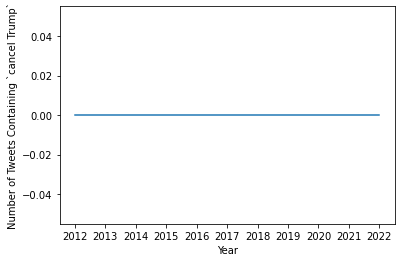

In [86]:
plt.plot(yearly_mentions["Year Created"], yearly_mentions["contains_cancel_trump"])
plt.xlabel("Year")
plt.ylabel("Number of Tweets Containing `cancel Trump`")
plt.show()

Sentiment Analysis

In [89]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [88]:
sia = SentimentIntensityAnalyzer()

In [87]:
tweets["polarity"] = tweets["clean_tweets"].apply(lambda x: sia.polarity_scores(x))

In [90]:
tweets[['neg', 'neu', 'pos', 'compound']] = tweets['polarity'].apply(pd.Series)
tweets.drop('polarity', axis=1)

,User,Date Created,Number of Likes,Source of Tweet,Tweet,Retweet Count,clean_tweets,contains_cancel_trump,Year Created,neg,neu,pos,compound
0,_4D4D,2012-12-31 23:52:45+00:00,0.0,Twitter for BlackBerry®,@realDonaldTrump fuck you donald trump you sha...,0.0,realdonaldtrump fuck donald trump shameless hy...,False,2012,0.758,0.242,0.000,-0.9100
1,HotDuckOrg,2012-12-31 23:51:56+00:00,0.0,twitterfeed,Miss Pennsylvania idømt million-bøde: Donald T...,0.0,miss pennsylvania idømt millionbøde donald tru...,False,2012,0.167,0.833,0.000,-0.2960
2,emilyybroon,2012-12-31 23:51:10+00:00,1.0,Twitter for Android,"""visit Scotland, before Donald Trump turns it ...",0.0,visit scotland donald trump turns golf course ...,False,2012,0.000,1.000,0.000,0.0000
3,getawayplacess,2012-12-31 23:51:10+00:00,0.0,Twitter for iPhone,LOOOOOOL I TWEETED HAPPY NEW YEAR TO DONALD TR...,0.0,looooool tweeted happy new year donald trump r...,False,2012,0.000,0.748,0.252,0.5719
4,GugsM,2012-12-31 23:50:52+00:00,0.0,Twitter for iPad,Lol! Do better Emily! “@stephlombard: Had to G...,0.0,lol better emily stephlombard google obeezy sh...,False,2012,0.139,0.385,0.476,0.7906
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11007,EnlightenBright,2022-12-31 21:55:59+00:00,0.0,Twitter for iPhone,@NickAdamsinUSA God hates Donald Trump because...,0.0,nickadamsinusa god hates donald trump supporte...,False,2022,0.076,0.550,0.374,0.8555
11008,PaulFox50854324,2022-12-31 21:55:56+00:00,6.0,Twitter for Android,Just how vile is Donald Trump?\nhttps://t.co/t...,3.0,just vile donald trump httpstcotf3jv9kfqo,False,2022,0.506,0.494,0.000,-0.6249
11009,eaglesfly321,2022-12-31 21:55:55+00:00,0.0,Twitter for iPhone,@MarkHamill Seriously why does everything with...,0.0,markhamill seriously does liberals donald trump,False,2022,0.254,0.746,0.000,-0.1779
11010,Alesio424291,2022-12-31 21:55:54+00:00,1.0,Twitter for Android,Es posible que el presidente de Brasil Jair Bo...,1.0,es posible que el presidente brasil jair bolso...,False,2022,0.000,1.000,0.000,0.0000


In [91]:
positive = sum(tweets["pos"])
negative = sum(tweets["neg"])
compound = sum(tweets["compound"])
neutral = sum(tweets["neu"])

print("Positive: ", positive)
print("Negative ", negative)
print("Compound", compound)
print("Neutral", neutral)

Positive:  1448.2799999999922
Negative  1211.8940000000046
Compound 178.50160000000034
Neutral 8350.82099999989


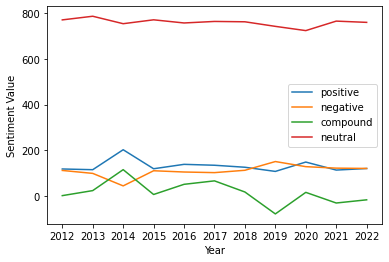

In [92]:
df = tweets.groupby("Year Created").sum().reset_index()

plt.plot(df["Year Created"], df["pos"], label="positive")
plt.plot(df["Year Created"], df["neg"], label = "negative")
plt.plot(df["Year Created"], df["compound"], label = "compound")
plt.plot(df["Year Created"], df["neu"], label = "neutral")
plt.xlabel("Year")
plt.ylabel("Sentiment Value")
plt.legend()
plt.show()


Topic Modelling

Referred to https://www.kaggle.com/code/vedraiyani/topic-modelling

In [94]:
data = tweets["clean_tweets"].values.tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]
data[:1]

<>:4: DeprecationWarning: invalid escape sequence \S
<>:7: DeprecationWarning: invalid escape sequence \s
<>:4: DeprecationWarning: invalid escape sequence \S
<>:7: DeprecationWarning: invalid escape sequence \s
<ipython-input-94-148db030e8e8>:4: DeprecationWarning: invalid escape sequence \S
  data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]
<ipython-input-94-148db030e8e8>:7: DeprecationWarning: invalid escape sequence \s
  data = [re.sub('\s+', ' ', sent) for sent in data]


['realdonaldtrump fuck donald trump shameless hypocrite selfish fuck']

In [95]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['realdonaldtrump', 'fuck', 'donald', 'trump', 'shameless', 'hypocrite', 'selfish', 'fuck']]


In [96]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['realdonaldtrump', 'fuck', 'donald', 'trump', 'shameless', 'hypocrite', 'selfish', 'fuck']


In [97]:
nltk.download('stopwords')
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [98]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [99]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

In [100]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['realdonaldtrump', 'fuck', 'donald', 'trump', 'shameless', 'hypocrite', 'selfish', 'fuck']]


In [101]:
tweets_lemmatized=data_lemmatized


In [107]:
id2word = Dictionary(tweets_lemmatized)
corpus = [id2word.doc2bow(tweet) for tweet in tweets_lemmatized]


In [108]:
# Build LDA model
lda_model = LdaModel(corpus=corpus,
                   id2word=id2word,
                   num_topics=10, 
                   random_state=0,
                   chunksize=100,
                   alpha='auto',
                   per_word_topics=True)

In [109]:
lda_model.print_topics()

[(0,
  '0.042*"make" + 0.040*"pay" + 0.031*"great" + 0.029*"look" + 0.027*"use" + 0.026*"try" + 0.024*"m" + 0.022*"leave" + 0.020*"world" + 0.019*"talk"'),
 (1,
  '0.061*"taxis" + 0.035*"day" + 0.035*"give" + 0.033*"lose" + 0.033*"head" + 0.027*"kind" + 0.024*"history" + 0.020*"jail" + 0.019*"mean" + 0.019*"public"'),
 (2,
  '0.063*"get" + 0.057*"vote" + 0.051*"criminal" + 0.049*"thing" + 0.029*"remember" + 0.025*"point" + 0.025*"send" + 0.016*"place" + 0.015*"face" + 0.013*"attack"'),
 (3,
  '0.345*"trump" + 0.132*"donald" + 0.054*"think" + 0.021*"big" + 0.014*"long" + 0.014*"justice" + 0.013*"associate" + 0.012*"medium" + 0.011*"betty_white" + 0.010*"es"'),
 (4,
  '0.037*"time" + 0.035*"need" + 0.031*"tax" + 0.030*"money" + 0.028*"release" + 0.027*"live" + 0.022*"tax_return" + 0.021*"love" + 0.017*"life" + 0.016*"ve"'),
 (5,
  '0.073*"s" + 0.063*"say" + 0.042*"lie" + 0.029*"good" + 0.023*"supporter" + 0.023*"bad" + 0.018*"include" + 0.016*"man" + 0.015*"speak" + 0.014*"run"'),
 (6,
 

In [112]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
#a measure of how well sentences fit together in document
coherence_model_lda = CoherenceModel(model=lda_model, texts=tweets_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -10.674869775786238

Coherence Score:  0.442809984683633


In [113]:
!pip install pyLDAvis


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [114]:
import pyLDAvis
import pyLDAvis.gensim

In [115]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.370068 -0.124207       1        1  14.108287
3      0.115049 -0.184735       2        1  13.754451
9     -0.010671  0.282563       3        1  13.708511
0      0.106771 -0.097699       4        1  12.459505
7     -0.033072  0.150732       5        1  11.350291
8      0.034666  0.040743       6        1  10.097279
4      0.094872 -0.084948       7        1   9.582956
1      0.021535  0.006043       8        1   5.866652
2      0.009636  0.005705       9        1   5.519233
6      0.031282  0.005803      10        1   3.552836, topic_info=                   Term         Freq        Total Category  logprob  loglift
6                 trump  3358.000000  3358.000000  Default  30.0000  30.0000
0                donald  1249.000000  1249.000000  Default  29.0000  29.0000
19                 year   854.000000   854.000000  Default  28.0000  28.0000
183                   s   704.000000   704.000000  Default  27.0000  27.0000
41                  say   615.000000   615.000000  Default  26.0000  26.0000
...                 ...          ...          ...      ...      ...      ...
10021            golfer    15.232206    16.104669  Topic10  -5.0773   3.2817
2751                sus    12.817435    13.572606  Topic10  -5.2499   3.2802
3346            purpose    13.170807    14.001612  Topic10  -5.2227   3.2763
6726   held_accountable    21.666057    91.046814  Topic10  -4.7250   1.9018
13332        donwinslow    15.801787    30.261759  Topic10  -5.0406   2.6877

[348 rows x 6 columns], token_table=       Topic      Freq            Term
term                                  
7389       2  0.972230  accomplishment
731        3  0.995624        actually
3773       9  0.986001           agree
1938       8  0.979136           allow
6553       7  0.987028          amazon
...      ...       ...             ...
142        4  0.995008           world
932        7  0.988879           wrong
13190      2  0.970030      yacht_club
19         6  0.999002            year
876        4  0.991282         youtube

[346 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 4, 10, 1, 8, 9, 5, 2, 3, 7])

In [116]:
list(lda_model.get_document_topics(corpus[1]))


[(0, 0.12749235),
 (1, 0.05323256),
 (2, 0.052233614),
 (3, 0.12841366),
 (4, 0.09690813),
 (5, 0.15249519),
 (6, 0.03094448),
 (7, 0.11413946),
 (8, 0.10050583),
 (9, 0.1436347)]

In [72]:
lda_model.show_topic(0)


[('pay', 0.04612193),
 ('call', 0.045543503),
 ('maga', 0.033346042),
 ('agree', 0.030589769),
 ('office', 0.030249728),
 ('use', 0.026552152),
 ('state', 0.021971693),
 ('life', 0.020410588),
 ('point', 0.01913917),
 ('leader', 0.015837794)]

Find dominant topic in each tweet

In [119]:
def find_dom_topics(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row[0], key=lambda x: (x[1]), reverse=True)
        dominant_topic = row[0]
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        sent_topics_df = sent_topics_df.append(pd.Series([int(dominant_topic[0]), round(dominant_topic[1],4)]), ignore_index=True)

    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_dominant_topic = find_dom_topics(ldamodel=lda_model, corpus=corpus, texts=tweets_lemmatized)

# Format
df_dominant_topic = df_dominant_topic.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Text']

# Show
df_dominant_topic.head(10)


<ipython-input-119-6af0236a12c9>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(dominant_topic[0]), round(dominant_topic[1],4)]), ignore_index=True)
<ipython-input-119-6af0236a12c9>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(dominant_topic[0]), round(dominant_topic[1],4)]), ignore_index=True)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Text
0,0,0.0,0.3713,"[realdonaldtrump, fuck, donald, trump, shamele..."
1,1,5.0,0.1525,"[har, faet, retten, httptcol, dtjinw]"
2,2,7.0,0.2568,"[visit, turn]"
3,3,9.0,0.3057,"[tweet, happy, new, year, donald, right, tweet..."
4,4,8.0,0.2099,"[lol, well, emily, stephlombard, hate, obeezy]"
5,5,7.0,0.2842,"[remind, movie, dumb, dumb, complain, httptcou..."
6,6,5.0,0.1522,[imma_blunt]
7,7,4.0,0.5154,"[realize, dad, rich, kid, little, rascal]"
8,8,7.0,0.2841,"[deal, deal, pull, say, fire]"
9,9,7.0,0.5226,"[tell, runner, apprentice, anchor, evening, ne..."


Find the most representative document for each topic

In [120]:
# Group top 5 sentences under each topic
df_topics_doc = pd.DataFrame()

df_dominant_topic_grpd = df_dominant_topic.groupby('Dominant_Topic')

for i, grp in df_dominant_topic_grpd:
    df_topics_doc = pd.concat([df_topics_doc, 
                                             grp.sort_values(['Topic_Perc_Contrib'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
df_topics_doc.reset_index(drop=True, inplace=True)

# Format
df_topics_doc.columns = ['Document_No', 'Topic_Num', "Topic_Perc_Contrib", "Text"]

# Show
df_topics_doc

,Document_No,Topic_Num,Topic_Perc_Contrib,Text
0,7949,0.0,0.7614,"[revelers_globe, decade_remembere, rise_social..."
1,10513,1.0,0.7303,"[klhu, lordbutter, trumpcrazytrain, againmothr..."
2,124,2.0,0.6157,"[thing, stay, hair, get, mad]"
3,10540,3.0,0.6599,"[yacht_club, sold_current, fp_dtyc, httpstcojq..."
4,9983,4.0,0.6842,"[family_fleece, america_arent, held_accountabl..."
5,5829,5.0,0.6990,"[see, uber, driver, crack, pipe, passenger, se..."
6,10984,6.0,0.6470,"[eso, sus, declaracione, impuesto, cuentan, su..."
7,10414,7.0,0.7129,"[take, twitter, late, reunite, series, controv..."
8,4094,8.0,0.6733,"[happy, new, year, happy, new, year, gilligan,..."
9,4424,9.0,0.7053,"[internet, respond, childish, nye, message, co..."


Topic distribution across documents¶

<Axes: >

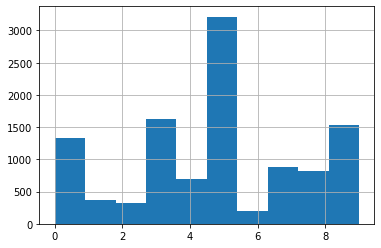

In [121]:
df_dominant_topic['Dominant_Topic'].hist(bins=10)


In [122]:
# Number of Documents for Each Topic
topic_counts = df_dominant_topic['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Concatenate Column wise
df_topics = pd.concat([topic_counts, topic_contribution], axis=1)

# Change Column names
df_topics.columns = ['Num_Documents', 'Perc_Documents']

# Show
df_topics

,Num_Documents,Perc_Documents
5.0,3213,0.2918
3.0,1631,0.1481
9.0,1529,0.1389
0.0,1337,0.1214
7.0,888,0.0806
8.0,821,0.0746
4.0,692,0.0628
1.0,374,0.0340
2.0,330,0.0300
6.0,196,0.0178


<Axes: >

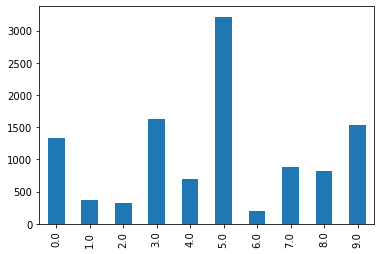

In [123]:
df_topics.sort_index().Num_Documents.plot.bar()


<Axes: >

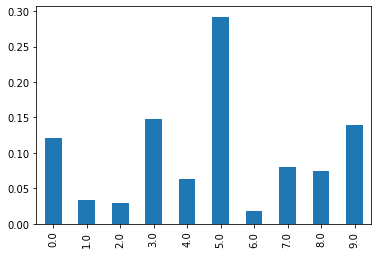

In [124]:
df_topics.sort_index().Perc_Documents.plot.bar()


In [125]:
tfidf = models.TfidfModel(corpus, smartirs='ntc')
tfidf_corpus=[]
for doc in tfidf[corpus]:
   tfidf_corpus.append([(id, np.around(freq,decimals=2)) for id, freq in doc])

lda_model2 = LdaModel(corpus=tfidf_corpus,
                   id2word=id2word,
                   num_topics=10, 
                   random_state=0,
                   chunksize=100,
                   alpha='auto',
                   per_word_topics=True)

In [126]:
# Compute Perplexity
print('\nPerplexity: ', lda_model2.log_perplexity(tfidf_corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda2 = CoherenceModel(model=lda_model2, texts=tweets, dictionary=id2word, coherence='c_v')
coherence_lda2 = coherence_model_lda2.get_coherence()
print('\nCoherence Score: ', coherence_lda2)


Perplexity:  -12.839453888106842


/usr/local/lib/python3.9/dist-packages/gensim/topic_coherence/direct_confirmation_measure.py:204: RuntimeWarning: divide by zero encountered in double_scalars
  m_lr_i = np.log(numerator / denominator)
/usr/local/lib/python3.9/dist-packages/gensim/topic_coherence/indirect_confirmation_measure.py:323: RuntimeWarning: invalid value encountered in double_scalars
  return cv1.T.dot(cv2)[0, 0] / (_magnitude(cv1) * _magnitude(cv2))



Coherence Score:  nan


In [127]:
lda_model2.print_topics()


[(0,
  '0.029*"country" + 0.020*"pay" + 0.019*"supporter" + 0.018*"get" + 0.018*"tell" + 0.017*"debate" + 0.017*"look" + 0.016*"rating" + 0.016*"use" + 0.015*"leave"'),
 (1,
  '0.023*"trump" + 0.012*"donald" + 0.008*"lie" + 0.008*"think" + 0.008*"taxis" + 0.006*"liberal" + 0.006*"release" + 0.006*"criminal" + 0.006*"new" + 0.006*"biden"'),
 (2,
  '0.058*"say" + 0.029*"good" + 0.026*"thing" + 0.023*"lose" + 0.018*"really" + 0.017*"send" + 0.011*"beat" + 0.010*"hand" + 0.010*"black" + 0.010*"friend"'),
 (3,
  '0.043*"make" + 0.032*"live" + 0.025*"maybe" + 0.024*"life" + 0.016*"start" + 0.016*"happen" + 0.013*"spend" + 0.006*"rich" + 0.006*"speech" + 0.004*"boy"'),
 (4,
  '0.036*"tax" + 0.032*"need" + 0.031*"money" + 0.022*"ve" + 0.018*"turn" + 0.016*"job" + 0.011*"little" + 0.009*"kid" + 0.008*"far" + 0.008*"play"'),
 (5,
  '0.037*"bad" + 0.034*"include" + 0.027*"speak" + 0.020*"person" + 0.012*"que" + 0.012*"power" + 0.010*"hot" + 0.007*"poll" + 0.006*"learned_read" + 0.006*"hottake"'),

In [128]:
vis2 = pyLDAvis.gensim.prepare(lda_model2, tfidf_corpus, id2word)
vis2

/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:299: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  token_table['Freq'] = token_table['Freq'].round()
/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:300: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.354400 -0.005926       1        1  52.654114
0     -0.034321  0.252586       2        1  13.303997
8     -0.047338 -0.057425       3        1   7.672963
7     -0.052591 -0.060341       4        1   7.620169
2     -0.045550 -0.031233       5        1   5.948187
9     -0.040249 -0.024994       6        1   3.598228
4     -0.036014 -0.020426       7        1   2.595645
3     -0.032792 -0.017482       8        1   2.274703
6     -0.032024 -0.016766       9        1   2.173064
5     -0.033523 -0.017993      10        1   2.158930, topic_info=              Term        Freq       Total Category  logprob  loglift
19            year  103.000000  103.000000  Default  30.0000  30.0000
183              s   96.000000   96.000000  Default  29.0000  29.0000
41             say   80.000000   80.000000  Default  28.0000  28.0000
425         people   70.000000   70.000000  Default  27.0000  27.0000
179        country   90.000000   90.000000  Default  26.0000  26.0000
...            ...         ...         ...      ...      ...      ...
4914          less    0.043943    1.335866  Topic10  -9.3484   0.4211
5382         demon    0.041068    7.216545  Topic10  -9.4161  -1.3333
9049     recommend    0.041204   12.730179  Topic10  -9.4128  -1.8976
13098  rittenhouse    0.037740    6.476917  Topic10  -9.5006  -1.3097
7050          kyle    0.037404    6.379337  Topic10  -9.5096  -1.3035

[392 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
4919      7  0.524421     abandon
76        6  0.966646     account
330       1  0.596857  accountant
330       5  0.298429  accountant
731       6  0.997137    actually
...     ...       ...         ...
712       5  0.927940        word
446       3  0.967138        work
142       2  0.998677       world
19        3  0.997994        year
876       2  0.989602     youtube

[270 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 9, 8, 3, 10, 5, 4, 7, 6])